In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten,Convolution2D, MaxPooling2D


In [2]:
from keras.utils import np_utils
from keras.datasets import fashion_mnist

In [3]:
(Xtrain,Ytrain),(Xtest,Ytest)=fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

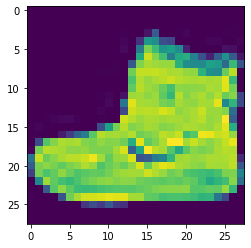

9


In [5]:
plt.imshow(Xtrain[0])
plt.show()
print(Ytrain[0])

In [6]:
Xtrain=Xtrain.reshape(Xtrain.shape[0],28,28,1)
Xtest=Xtest.reshape(Xtest.shape[0],28,28,1)
Xtrain=Xtrain.astype('float32')
Xtest=Xtest.astype('float32')

Xtrain/=255
Xtest/=255
print(Ytrain[0])


9


In [7]:
Ytrain=np_utils.to_categorical(Ytrain,10)
Ytest=np_utils.to_categorical(Ytest,10)
print(Ytrain[0])




[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xtrain,Ytrain,batch_size=1024,epochs=10,verbose=1)

Epoch 1/10
59/59 [==============================] - 4s 26ms/step - loss: 1.1230 - accuracy: 0.6419
Epoch 2/10
59/59 [==============================] - 1s 22ms/step - loss: 0.5722 - accuracy: 0.7886
Epoch 3/10
59/59 [==============================] - 1s 21ms/step - loss: 0.4959 - accuracy: 0.8210
Epoch 4/10
59/59 [==============================] - 1s 20ms/step - loss: 0.4448 - accuracy: 0.8413
Epoch 5/10
59/59 [==============================] - 1s 22ms/step - loss: 0.4156 - accuracy: 0.8526
Epoch 6/10
59/59 [==============================] - 1s 22ms/step - loss: 0.3929 - accuracy: 0.8607
Epoch 7/10
59/59 [==============================] - 1s 23ms/step - loss: 0.3729 - accuracy: 0.8688
Epoch 8/10
59/59 [==============================] - 1s 21ms/step - loss: 0.3568 - accuracy: 0.8744
Epoch 9/10
59/59 [==============================] - 1s 22ms/step - loss: 0.3473 - accuracy: 0.8772
Epoch 10/10
59/59 [==============================] - 1s 21ms/step - loss: 0.3377 - accuracy: 0.8800


In [11]:
pred=model.predict(Xtest[np.newaxis,1])
pred

1/1 [==============================] - 0s 196ms/step


array([[7.4108801e-04, 1.2695966e-07, 9.9494886e-01, 1.9872839e-05,
        1.2719491e-03, 1.3908669e-08, 3.0043575e-03, 1.7356803e-11,
        1.3773158e-05, 7.6349038e-11]], dtype=float32)

In [12]:
Prediction=pred.argmax(axis=1)
Prediction

array([2])

2
Pullover


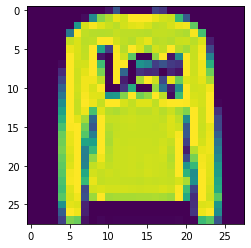

In [13]:
print(Prediction[0])
print (class_names[Prediction[0]] ) 
img=(Xtest[1]*255).reshape((28,28)).astype('uint8')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 49ms/step
Pullover


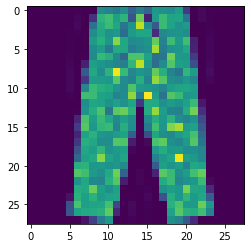

1/1 [==============================] - 0s 37ms/step
Pullover


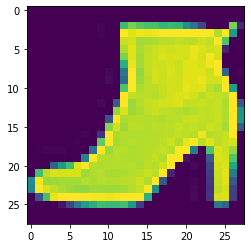

1/1 [==============================] - 0s 73ms/step
Pullover


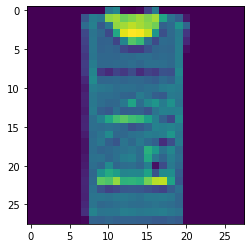

1/1 [==============================] - 0s 20ms/step
Pullover


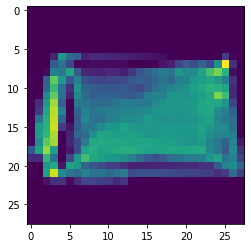

1/1 [==============================] - 0s 23ms/step
Pullover


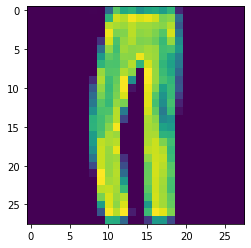

1/1 [==============================] - 0s 18ms/step
Pullover


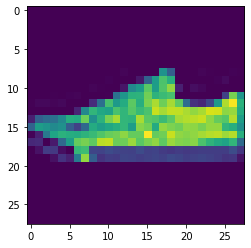

1/1 [==============================] - 0s 17ms/step
Pullover


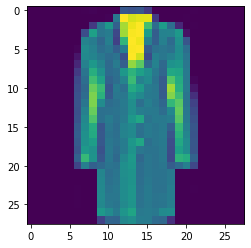

1/1 [==============================] - 0s 18ms/step
Pullover


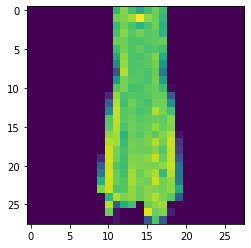

1/1 [==============================] - 0s 16ms/step
Pullover


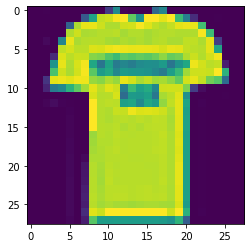

1/1 [==============================] - 0s 19ms/step
Pullover


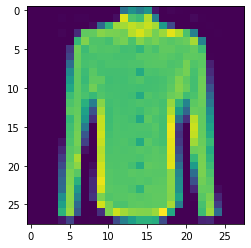

In [14]:
for i in np. random. choice (np.arange (0,len (Ytest)), size = (10,)):
  pred = model . predict (Xtest [np.newaxis, i]) 
  prediction = pred.argmax (axis=1) 
  img= (Xtest [i] *255) . reshape( (28, 28)) . astype ('uint8') 
  print (class_names[Prediction[0]] ) 
  plt . imshow (img) 
  plt . show ( ) 